In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Read in intermediate datasets from 03_Exploratory_Data_Analysis

In [4]:
# Consolidate the hit and non-hit songs into one dataset
data = pd.read_csv('modeling_dataset_32k.csv')

In [5]:
# Drop non-numeric columns
data_numeric = data.drop(['song', 'artist', 'song_artist'], axis=1)

# 7. Modeling

In [6]:
# Split data into features (X) and labels (y)
X = data_numeric.drop('hit_song', axis=1)
y = data_numeric['hit_song']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression model 

### 1) Logistic Regression model initiation and training using all features in dataset

In [9]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

### 2) Make prediction using the Logistic Regression model trained with all features

In [10]:
y_pred_lr = model_lr.predict(X_test_scaled)

In [11]:
# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.7238546603475513

In [12]:
class_report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
pd.DataFrame(class_report_lr).transpose()

,precision,recall,f1-score,support
0,0.784641,0.604113,0.682643,3112.000000
1,0.686833,0.839652,0.755593,3218.000000
accuracy,0.723855,0.723855,0.723855,0.723855
macro avg,0.735737,0.721883,0.719118,6330.000000
weighted avg,0.734918,0.723855,0.719729,6330.000000


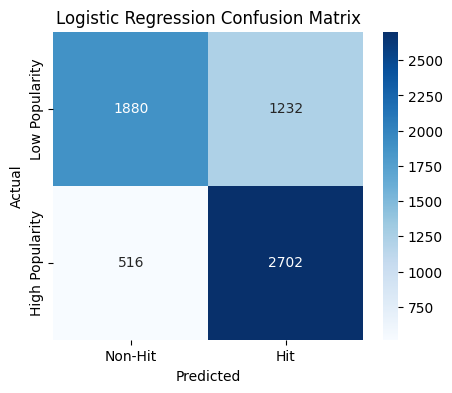

In [13]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

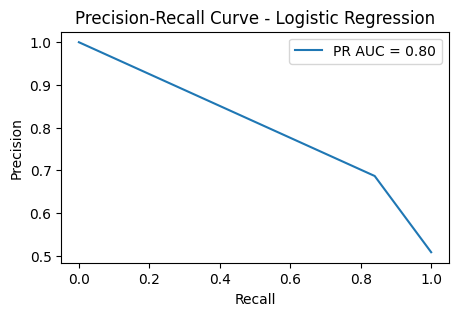

In [14]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.show()


### 3) Extract the coefficients of the features
#### *Identify the features with the most significant relationship with the likelihood of a song being a hit or non-hit.*

In [15]:
# Extracting the coefficients
coefficients = model_lr.coef_[0]
features = X.columns

In [16]:
# Create a DataFrame to display feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the coefficients for better visualization
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_abs = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
coef_df_abs

,Feature,Coefficient,Absolute_Coefficient
7,instrumentalness,-1.199354,1.199354
3,loudness,0.782263,0.782263
1,energy,-0.533516,0.533516
6,acousticness,-0.430334,0.430334
0,danceability,0.371142,0.371142
13,year,-0.211548,0.211548
5,speechiness,-0.169351,0.169351
9,valence,0.140548,0.140548
12,time_signature,0.116313,0.116313
8,liveness,-0.098810,0.098810


### 4) Train another Logistic Regression model with the top 5 features and make prediction

In [17]:
features_to_use = ['instrumentalness', 'loudness', 'energy', 'acousticness', 'danceability']
X_5f = data_numeric[features_to_use]
y_5f = data_numeric['hit_song']
X_train_5f, X_test_5f, y_train_5f, y_test_5f = train_test_split(X_5f, y_5f, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_5f = scaler.fit_transform(X_train_5f)
X_test_5f = scaler.transform(X_test_5f)

In [19]:
model_lr_5f = LogisticRegression()
model_lr_5f.fit(X_train_5f, y_train_5f)

LogisticRegression()

In [20]:
y_pred_5f = model_lr_5f.predict(X_test_5f)

In [21]:
# Evaluate the model
accuracy_lr_5f = accuracy_score(y_test_5f, y_pred_5f)
accuracy_lr_5f

0.710742496050553

In [22]:
class_report_lr_5f = classification_report(y_test_5f, y_pred_5f, output_dict=True)
pd.DataFrame(class_report_lr_5f).transpose()

,precision,recall,f1-score,support
0,0.771975,0.584190,0.665081,3112.000000
1,0.674465,0.833126,0.745447,3218.000000
accuracy,0.710742,0.710742,0.710742,0.710742
macro avg,0.723220,0.708658,0.705264,6330.000000
weighted avg,0.722404,0.710742,0.705937,6330.000000


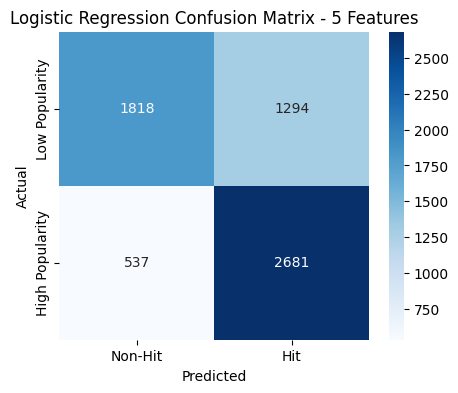

In [23]:
conf_matrix_lr_5f = confusion_matrix(y_test_5f, y_pred_5f)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_lr_5f, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hit', 'Hit'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Logistic Regression Confusion Matrix - 5 Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Classifier model 

### 1) Random Forest Classifier model initiation and training

In [24]:
# Initialize and train the RandomForestClassifier with all features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make prediction
y_pred_rf = rf_model.predict(X_test_scaled)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
accuracy

0.782306477093207

In [27]:
class_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf).transpose()

,precision,recall,f1-score,support
0,0.823749,0.708869,0.762003,3112.000000
1,0.751917,0.853325,0.799418,3218.000000
accuracy,0.782306,0.782306,0.782306,0.782306
macro avg,0.787833,0.781097,0.780711,6330.000000
weighted avg,0.787231,0.782306,0.781024,6330.000000


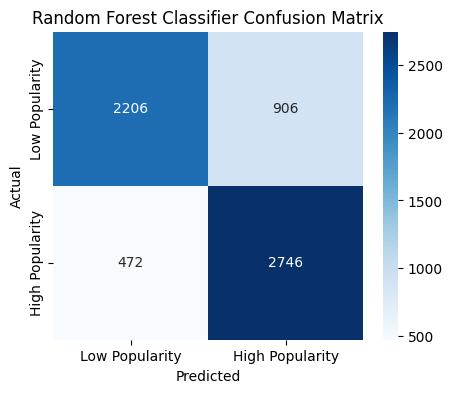

In [28]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Random Forest Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2) Plot a single decision tree from the Random Forest, with the first three levels of dept

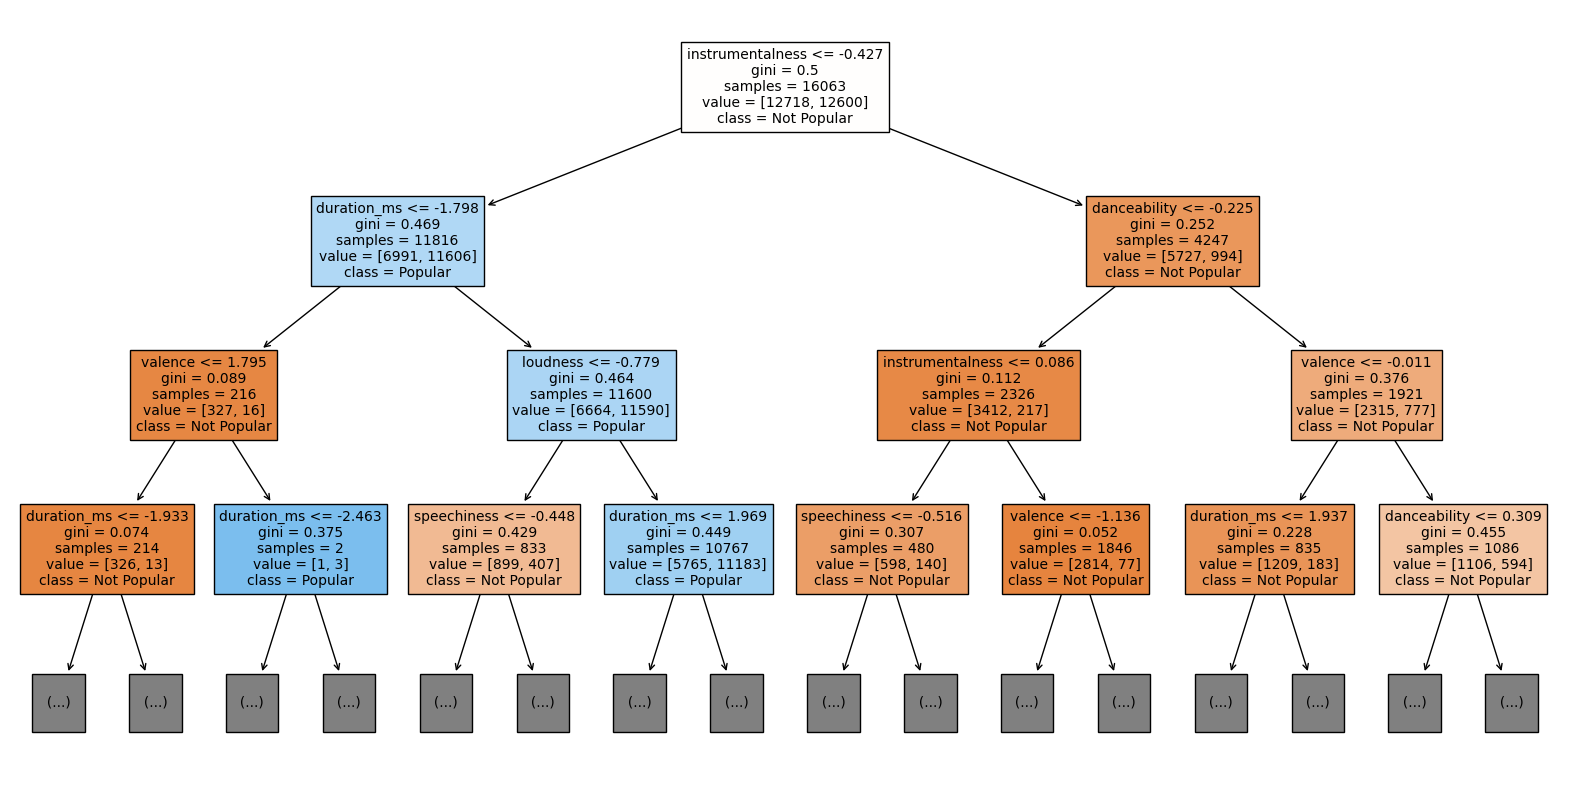

In [29]:
from sklearn.tree import plot_tree

# Select one tree from the random forest
single_tree = rf_model.estimators_[0]

# Set the figure size for the plot
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['Not Popular', 'Popular'], 
          max_depth=3,  # Set the maximum depth to avoid a very large tree
          fontsize=10)

# Show the plot
plt.show()

### 3) Feature importance in this RandomForestClassifier model

In [30]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
7   instrumentalness    0.170396
6       acousticness    0.108202
11       duration_ms    0.095441
1             energy    0.093027
3           loudness    0.089381
0       danceability    0.081934
9            valence    0.070018
5        speechiness    0.068295
8           liveness    0.059563
10             tempo    0.059210
13              year    0.056140
2                key    0.032682
4               mode    0.008313
12    time_signature    0.007398


### 4) Hyperparameter Tuning the Random Forest Classifier
#### *Use Randomized Search with Cross-Validation to identify the best hyperparameter values for the Random Forest classifier.*

In [31]:
# Fine-tune the Random Forest model using Randomized Search to improve its accuracy
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid to sample from during fitting
param_distributions = {'n_estimators': np.arange(100, 1001, 100), 
    'max_depth': [None] + list(np.arange(5, 51, 5)),  
    'min_samples_split': np.arange(2, 11, 1),  
    'min_samples_leaf': np.arange(1, 11, 1),  
    'bootstrap': [True, False]}  

In [32]:
# Initialize another RandomForestClassifier
rf_model_tuned = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(estimator=rf_model_tuned, param_distributions=param_distributions, n_iter=8,
    cv=3, verbose=2, random_state=42, n_jobs=-1)

In [33]:
# Start Timing
import time
start_time = time.time()

In [34]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20, 25,
                                                      30, 35, 40, 45, 50],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
                   random_state=42, verbose=2)

In [35]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting: {elapsed_time} seconds")

Elapsed time for RandomizedSearchCV fitting: 328.1227719783783 seconds


In [36]:
# Get the best parameters from the randomized search
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 600, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 30, 'bootstrap': False}
Best score: 0.7731259197358537


In [37]:
# Use the best model from randomized search
best_rf_model = random_search.best_estimator_
best_y_pred_rf = best_rf_model.predict(X_test_scaled)

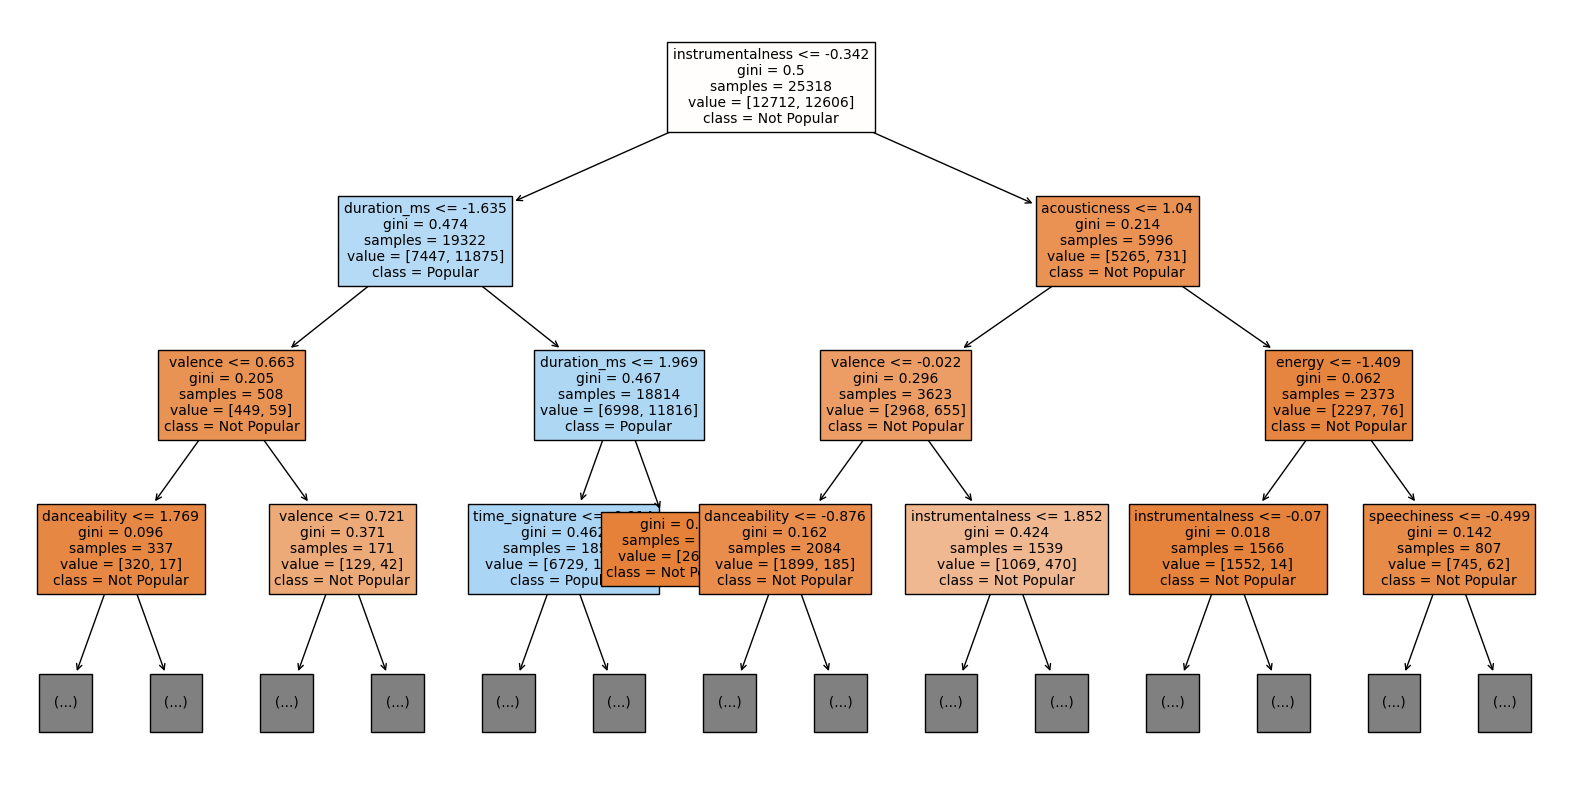

In [38]:
from sklearn.tree import plot_tree

# Select one tree from the random forest
single_tree = best_rf_model.estimators_[0]

# Set the figure size for the plot
plt.figure(figsize=(20,10))

# Plot the tree
plot_tree(single_tree, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['Not Popular', 'Popular'], 
          max_depth=3,  # Set the maximum depth to avoid a very large tree
          fontsize=10)

# Show the plot
plt.show()

In [39]:
# Evaluate the model
accuracy_rf_best = accuracy_score(y_test, best_y_pred_rf)
accuracy_rf_best

0.7837282780410743

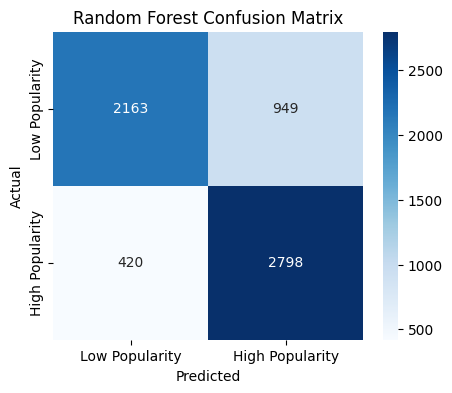

In [40]:
conf_matrix_kn = confusion_matrix(y_test, best_y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
class_report_rf_best = classification_report(y_test, best_y_pred_rf, output_dict=True)
pd.DataFrame(class_report_rf_best).transpose()

,precision,recall,f1-score,support
0,0.837398,0.695051,0.759614,3112.000000
1,0.746731,0.869484,0.803446,3218.000000
accuracy,0.783728,0.783728,0.783728,0.783728
macro avg,0.792065,0.782268,0.781530,6330.000000
weighted avg,0.791305,0.783728,0.781897,6330.000000


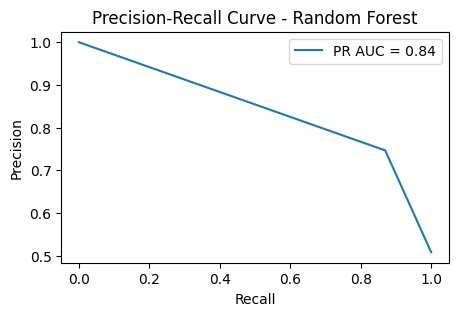

In [42]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_y_pred_rf)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend()
plt.show()

## K-Nearest Neighbors Classifier model

### 1) K-Nearest Neighbors Classifier model initiation and training

In [43]:
# Initialize and train the KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [44]:
y_pred_kn = knn_model.predict(X_test_scaled)

In [45]:
# Evaluate the model
accuracy_kn = accuracy_score(y_test, y_pred_kn)
accuracy_kn

0.728909952606635

In [46]:
class_report_kn = classification_report(y_test, y_pred_kn, output_dict=True)
pd.DataFrame(class_report_kn).transpose()

,precision,recall,f1-score,support
0,0.773725,0.633997,0.696927,3112.00000
1,0.698677,0.820696,0.754787,3218.00000
accuracy,0.728910,0.728910,0.728910,0.72891
macro avg,0.736201,0.727347,0.725857,6330.00000
weighted avg,0.735573,0.728910,0.726341,6330.00000


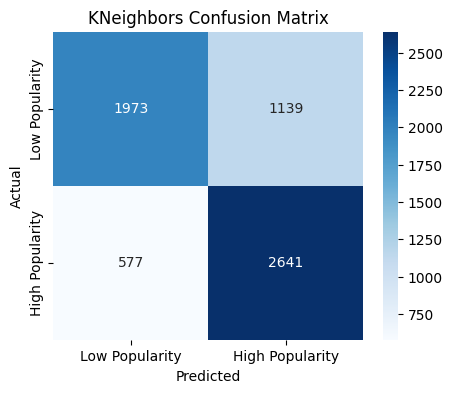

In [47]:
conf_matrix_kn = confusion_matrix(y_test, y_pred_kn)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_kn, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('KNeighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

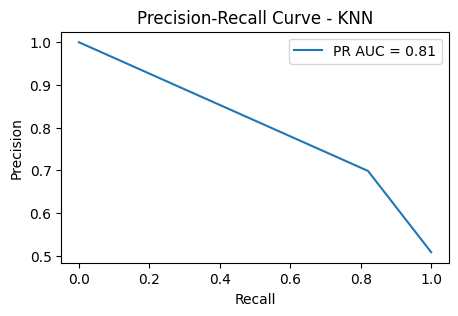

In [48]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_kn)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - KNN')
plt.legend()
plt.show()

### 2) K-Nearest Neighbors 3D Clustering

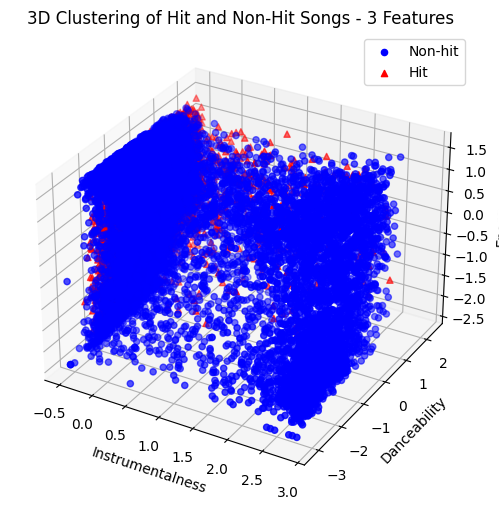

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Selecting features
instrumentalness, danceability, energy = X_train_scaled[:, 7], X_train_scaled[:, 0], X_train_scaled[:, 1]

fig = plt.figure(figsize=(12, 6)) 
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for non-hit and hit songs
ax.scatter(instrumentalness[y_train == 0], danceability[y_train == 0], energy[y_train == 0],
           c='blue', marker='o', label='Non-hit') 
ax.scatter(instrumentalness[y_train == 1], danceability[y_train == 1], energy[y_train == 1],
           c='red', marker='^', label='Hit')  

ax.set_xlabel('Instrumentalness')
ax.set_ylabel('Danceability')
ax.set_zlabel('Energy')
ax.set_title('3D Clustering of Hit and Non-Hit Songs - 3 Features')  
ax.legend()

## XGBoost Classifier model

### 1) XGBoost Classifier model initiation and training

In [50]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [51]:
# Prediction
y_pred_xgb = xgb_clf.predict(X_test_scaled)

In [52]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.7761453396524487

In [53]:
class_report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
pd.DataFrame(class_report_xgb).transpose()

,precision,recall,f1-score,support
0,0.815173,0.704370,0.755732,3112.000000
1,0.747322,0.845556,0.793410,3218.000000
accuracy,0.776145,0.776145,0.776145,0.776145
macro avg,0.781248,0.774963,0.774571,6330.000000
weighted avg,0.780679,0.776145,0.774886,6330.000000


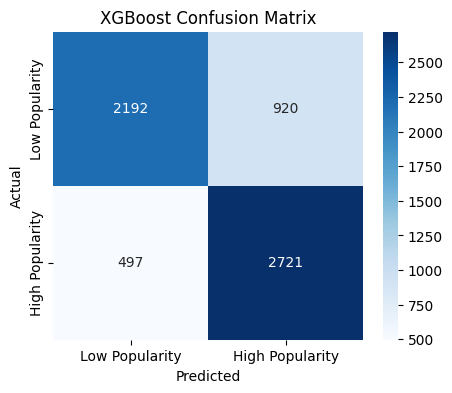

In [54]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

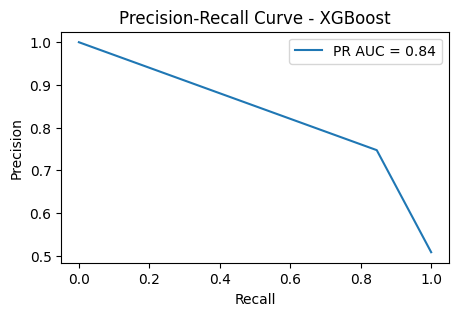

In [55]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.show()

### 2) Hyperparameter Tuning the XGBoost Classifier

In [56]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': np.arange(3, 10, 2),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]}

In [57]:
# Initialize the XGBoost classifier
xgb_clf_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [58]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, n_iter=8, cv=3, verbose=1, n_jobs=-1, random_state=42)

In [59]:
import time

# Start timing
start_time = time.time()

In [60]:
# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 3 folds for each of 8 candidates, totalling 24 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': array([3, 5, 7, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250]),
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=1)

In [61]:
# End timing
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time for RandomizedSearchCV fitting with XGBoost: {elapsed_time} seconds")

Elapsed time for RandomizedSearchCV fitting with XGBoost: 105.48607587814331 seconds


In [62]:
# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'subsample': 0.6, 'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score: 0.774626761105205


In [63]:
# Predict using the best estimator
best_xgb_clf = random_search.best_estimator_
y_pred_xgb_best = best_xgb_clf.predict(X_test_scaled)

In [64]:
# Evaluate the model
accuracy_xgb_best = accuracy_score(y_test, y_pred_xgb_best)
accuracy_xgb_best

0.7859399684044234

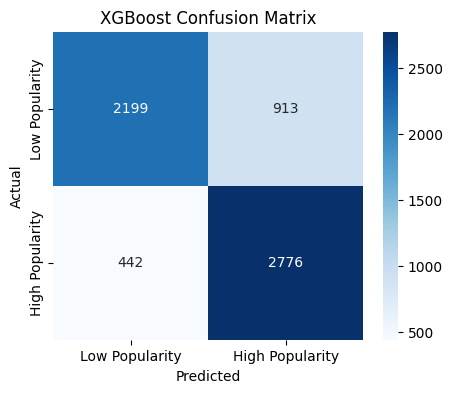

In [65]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_best)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Popularity', 'High Popularity'], yticklabels=['Low Popularity', 'High Popularity'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [66]:
class_report_xgb_best = classification_report(y_test, y_pred_xgb_best, output_dict=True)
pd.DataFrame(class_report_xgb_best).transpose()

,precision,recall,f1-score,support
0,0.832639,0.706620,0.764471,3112.00000
1,0.752507,0.862648,0.803822,3218.00000
accuracy,0.785940,0.785940,0.785940,0.78594
macro avg,0.792573,0.784634,0.784146,6330.00000
weighted avg,0.791902,0.785940,0.784476,6330.00000


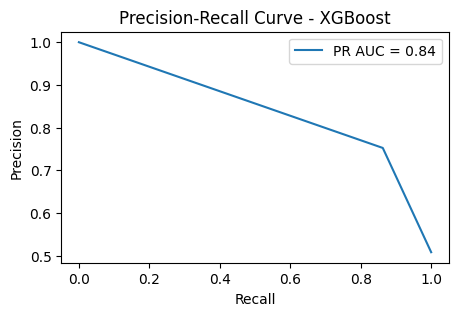

In [67]:
# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_xgb_best)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(5, 3))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend()
plt.show()

### 3) Plot the learning curve of the XGBoost model that has been optimized

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/sklearn.py:1

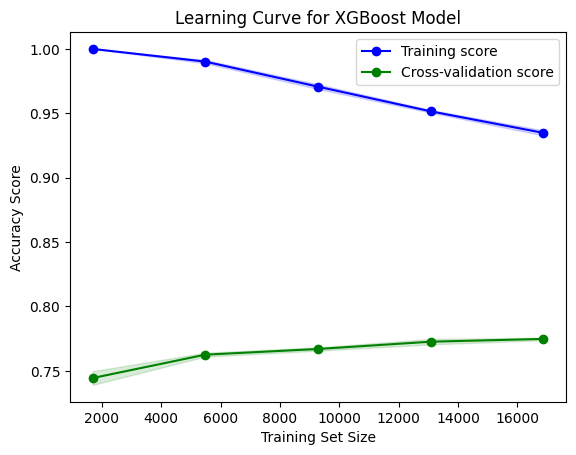

In [72]:
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(0.1, 1.0, 5)

# Compute the learning curve
train_sizes, train_scores, val_scores = learning_curve(
    best_xgb_clf, X_train_scaled, y_train,
    train_sizes=train_sizes, cv=3, scoring='accuracy')

# Calculate the average and standard deviation of the training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)

plt.plot(train_sizes, val_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.15)

plt.title('Learning Curve for XGBoost Model')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()

plt.show()

#### *The training score and the cross-validation score have a trend to converge if more training data is available, which indicates the model may generalize better with larger datasets.*

### 3) Check the feature importance of the hyperparameter tuned XGBoost Classifier

In [69]:
# Check feature importance
importances = best_xgb_clf.feature_importances_

In [70]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print(feature_importance_df)

             Feature  Importance
7   instrumentalness    0.225372
6       acousticness    0.083678
11       duration_ms    0.081528
3           loudness    0.071540
12    time_signature    0.069485
1             energy    0.068482
13              year    0.062634
0       danceability    0.059210
9            valence    0.055501
5        speechiness    0.052328
10             tempo    0.045238
8           liveness    0.044712
4               mode    0.041294
2                key    0.038999
